#### STDLIB

In [154]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

data_path = '/Users/Alex/Desktop/APO/Q4JH03/UT161120/ARCTIC/'
fits_name = 'wasp44b_end_i_24.'
num_file = 597 - 478 + 1
cat_name = 'wasp44b'

def flux_ratio(mag):
    return 10 ** (-0.4 * mag)

f = fits.open(data_path + fits_name + '0478.fits')
print f[0].header['DATE-OBS'].split('T')[1]

06:40:33.813061


#### Find target and refstars

In [ ]:
ref_ra, ref_dec = np.loadtxt('/Users/Alex/Desktop/fourchettes/APO/wasp44b ref stars.txt', usecols=(0, 1), unpack=True, skiprows=1)

target_mag, ref_mag = np.zeros(num_file), np.zeros((10, num_file))
target_magerr, ref_magerr = np.zeros(num_file), np.zeros((10, num_file))

target_coord = SkyCoord('00 15 37 -11 56 20', unit=(u.hourangle, u.deg)).to_string('decimal').split()
target_ra, target_dec = float(target_coord[0]), float(target_coord[1])

for n in range(478, 597):
    mag, magerr, ra, dec = np.loadtxt(data_path + cat_name + str(n) + '.cat', skiprows=9, usecols=(3, 4, 7, 8), unpack=True)
    
    target_index = SkyCoord(ra=target_ra, dec=target_dec, unit=(u.degree)).match_to_catalog_3d(SkyCoord(ra=ra, dec=dec, unit=(u.degree)))
    target_index = int(target_index[0])
    target_mag[n - 478], target_magerr[n - 478] = mag[target_index], magerr[target_index]
    
    for i in range(len(ref_ra)):
        ref_index = SkyCoord(ra=ref_ra[i], dec=ref_dec[i], unit=(u.degree)).match_to_catalog_3d(SkyCoord(ra=ra, dec=dec, unit=(u.degree)))
        #print i, n, ref_index
        ref_index = int(ref_index[0])
        ref_mag[i, n - 478], ref_magerr[i, n - 478] = mag[ref_index], magerr[ref_index]

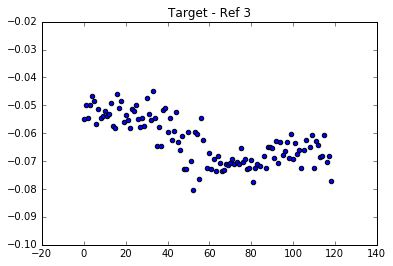

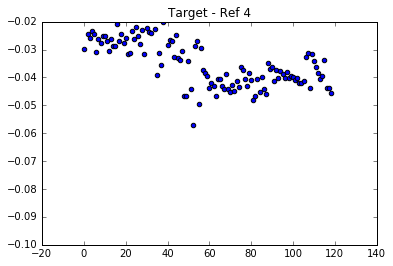

In [170]:
for j in range(2, 4): 
    plt.scatter(range(0, num_file - 1), (target_mag[:-1] - ref_mag[j, :-1]))
    plt.ylim(-0.1, -0.02)
    plt.title('Target - Ref ' + str(j + 1))
    plt.show()